### 목표: 생선 품종 분류 모델
 - 데 이 터 : 2가지 품종의 생선 데이터 fish.csv
  - feature : Weight, Length
  - target  : Species
  - 유    형: 지도학습 / 분류
   

1. 모듈 로딩, 데이터 준비

In [2]:
import pandas as pd                                 #데이터파일 관련모듈
from sklearn.neighbors import KNeighborsClassifier  #기계학습 관련 모듈

In [3]:
data = '../data/fish.csv'

#5개의 feature/특성 중 2개 선택
fishDF = pd.read_csv(data, usecols=[0,1,2])

fishDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length   159 non-null    float64
dtypes: float64(2), object(1)
memory usage: 3.9+ KB


In [36]:
# Bream, Smelt 품종 행만 추출
mask = fishDF.Species.isin(['Bream', 'Smelt']) # Boolean indexing

# 해당 행만 도출
twoFishDF=fishDF[mask] # species가 bream, smelt인 것만 필터링 하여 도출

# 인덱스 정리
twoFishDF.reset_index(drop=True, inplace=True)

In [5]:
# Bream, Smelt 품종명 수치화
# twoFishDF['Species']=twoFishDF['Species'].replace({'Bream':0, 'Smelt':1})
twoFishDF.loc[:,'Species'] = twoFishDF['Species'].replace({'Bream':0, 'Smelt':1}).copy()
twoFishDF.head()


,Species,Weight,Length
0,0,242.0,25.4
1,0,290.0,26.3
2,0,340.0,26.5
3,0,363.0,29.0
4,0,430.0,29.0


In [6]:
twoFishDF['Species'] = twoFishDF['Species'].astype(int).copy()
twoFishDF.dtypes

C:\Users\kdp\AppData\Local\Temp\ipykernel_12904\3450856886.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twoFishDF['Species'] = twoFishDF['Species'].astype(int).copy()


Species      int32
Weight     float64
Length     float64
dtype: object

2. 데이터 전처리<hr>
- 정제: 결측치, 중복데이터, 이상치 처리
- 정규화: feature 스케일링

3. 기계학습 데이터셋 준비=> 피처와 타겟 분리 <hr>

In [37]:
#피처/특성/속성 데이터 추출
featureDF = twoFishDF[twoFishDF.columns[1:]]
featureDF.head()

,Weight,Length
0,242.0,25.4
1,290.0,26.3
2,340.0,26.5
3,363.0,29.0
4,430.0,29.0


In [39]:
#class/ target/ label data extract  -> 수치화, "정수 인코딩"

targetDF = twoFishDF['Species']
targetDF.head(2)

0    Bream
1    Bream
Name: Species, dtype: object

In [40]:
targetDF = targetDF.replace({'Bream':0, 'Smelt':1})

3 - 1. 학습 / 테스트 데이터셋 분리 <hr>
- 지도학습 중 분류: [고려] 타깃의 비율
- 학습: 테스트 = 80 : 20 

In [42]:
#모듈 로딩
from sklearn.model_selection import train_test_split

In [44]:
X_train, X_test, y_train, y_test = train_test_split(featureDF, targetDF, test_size = 0.2, stratify= targetDF)

In [45]:
# 학습, 테스트 데이터셋 확인
print(f'학습용 데이터셋: \n{X_train.shape}, {y_train}')
print(f'\n {y_train.value_counts()/y_train.shape[0]}')
print(f'테스트용 데이터셋: \n{X_test.shape}, {y_test}')


학습용 데이터셋: 
(39, 2), 13    0
46    1
39    1
12    0
2     0
14    0
18    0
3     0
37    1
0     0
10    0
26    0
40    1
24    0
27    0
38    1
31    0
21    0
4     0
9     0
47    1
34    0
22    0
16    0
11    0
23    0
25    0
1     0
17    0
30    0
29    0
44    1
41    1
43    1
28    0
5     0
45    1
19    0
36    1
Name: Species, dtype: int64

 Species
0    0.717949
1    0.282051
Name: count, dtype: float64
테스트용 데이터셋: 
(10, 2), 48    1
7     0
33    0
35    1
42    1
20    0
6     0
32    0
15    0
8     0
Name: Species, dtype: int64


3 - 2. feature dataset scaling
<hr> : feature 값 범위 통일

In [41]:
# import module
from sklearn.preprocessing import StandardScaler

In [46]:
#표준정규분포 스케일링: 평균 0, 편차 1
# 1. 스케일러 인스턴스 생성
# 2. 데이터에 대한 평균과 표준편차 계산 진행: fit()
# 3. 데이터에 대한 스케일링 진행: transform()

In [47]:
scaler = StandardScaler()

In [48]:
scaler.fit(X_train)

StandardScaler()

In [49]:
scaler.mean_

array([444.33333333,  26.9974359 ])

In [50]:
scaler.transform(X_train)

array([[-0.3238391 ,  0.49938327],
       [-1.34129395, -1.3973005 ],
       [-1.34874329, -1.57698633],
       [ 0.17278316,  0.44947054],
       [-0.3238391 , -0.04965677],
       [ 0.48317207,  0.49938327],
       [ 0.51421096,  0.64912146],
       [-0.25244965,  0.19990689],
       [-1.35743418, -1.6368816 ],
       [-0.62802023, -0.15946478],
       [ 0.09518593,  0.39955781],
       [ 0.85563877,  0.79885965],
       [-1.35215756, -1.56700378],
       [ 0.79356099,  0.79885965],
       [ 0.83701543,  0.89868511],
       [-1.34905368, -1.59695142],
       [ 1.58505271,  1.14824877],
       [ 0.74700265,  0.69903419],
       [-0.04448908,  0.19990689],
       [ 0.17278316,  0.36961017],
       [-1.31801478, -1.2675274 ],
       [ 1.56953327,  1.39781242],
       [ 0.54524986,  0.74894692],
       [ 0.79356099,  0.59920873],
       [ 0.17278316,  0.39955781],
       [ 0.7314832 ,  0.79885965],
       [ 0.87115821,  0.79885965],
       [-0.47903355, -0.06962186],
       [ 0.79356099,

In [52]:
# 학습용 데이터 피처 스케일링
scaled_X_train = scaler.transform(X_train)
scaled_X_train.shape

(39, 2)

In [54]:
#테스트용 데이터 피처 스케일링
scaled_X_test = scaler.transform(X_test)
scaled_X_test.shape

(10, 2)

3 - 3. 시각화

In [55]:
#모듈 로딩
import matplotlib.pyplot as plt


Text(0, 0.5, 'Length')

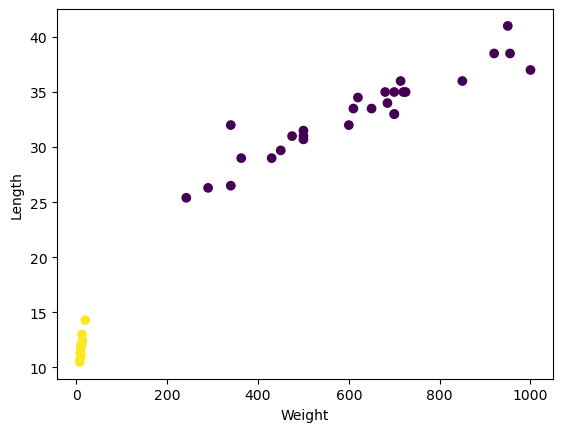

In [56]:
#원본데이터 시각화
plt.scatter(X_train.Weight, X_train.Length, c=y_train)
plt.xlabel('Weight')
plt.ylabel('Length')

Text(0, 0.5, 'Length')

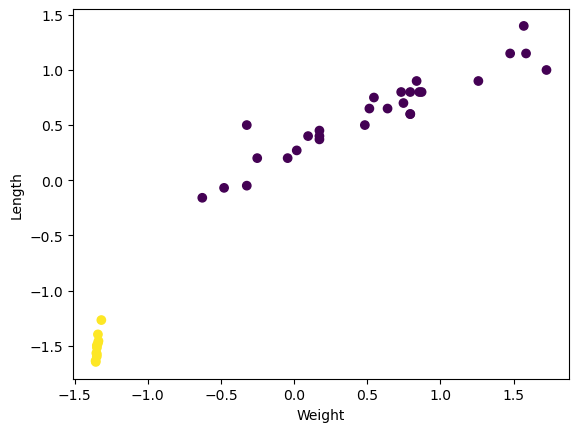

In [57]:
#스케일링된 데이터 시각화
plt.scatter(scaled_X_train[:,0], scaled_X_train[:,1], c= y_train)
plt.xlabel('Weight')
plt.ylabel('Length')

4. 학습 진행

In [58]:
# 방법: KNN
fishmodel = KNeighborsClassifier()
fishmodel

KNeighborsClassifier()

In [59]:
# 학습
fishmodel.fit(scaled_X_train, y_train)

KNeighborsClassifier()

In [66]:
#SVC
from sklearn.svm import SVC
fishmodel2 = SVC()
fishmodel2.fit(scaled_X_train, y_train)

SVC()

5. Test 진행

In [60]:
fishmodel.score(scaled_X_test, y_test)

1.0

In [ ]:
#방법3:
from sklearn.linear_model

6. 예측 <hr>

In [61]:
# 길이 25, 무게 160인 생선의 품종 예측
newdata = pd.DataFrame([[160,25]], columns= twoFishDF.columns[1:])
newdata

,Weight,Length
0,160,25


In [63]:
#feature scaling proceed

scaled_newdata = scaler.transform(newdata)

In [65]:
#예측
ypre = fishmodel.predict(scaled_newdata)